## Minist Classification task
- Construction of neural networks as well as training methods and common function analysis
- module of **torch.nn.function** 
- modele of **nn.Module**

In [128]:
# read dataset from Minist
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)


pathlib的mkdir接收两个参数：

- parents：如果父目录不存在，是否创建父目录。
- exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常。

In [129]:
# # 第二步，读数据（前两步先不用管）
# with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
# #     (x_train, y_train)训练集的样本数据和对应的标签, (x_valid, y_valid)验证集的样本数据和对应标签
#         ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

这儿错误的原因是deeplearning.net已经不能访问了

## Pickle module
它能够实现任意对象与文本之间的相互转化，也可以实现任意对象与二进制之间的相互转化。也就是说，pickle 可以实现 Python 对象的存储及恢复。

pickle 模块提供了以下 4 个函数供我们使用：
- dumps()：将 Python 中的对象序列化成二进制对象，并返回；
- loads()：读取给定的二进制对象数据，并将其转换为 Python 对象；
- dump()：将 Python 中的对象序列化成二进制对象，并写入文件；
- load()：读取指定的序列化数据文件，并返回对象。

看似强大的 pickle 模块，其实也有它的短板，即 pickle 不支持并发地访问持久性对象，在复杂的系统环境下，尤其是读取海量数据时，使用 pickle 会使整个系统的I/O读取性能成为瓶颈。这种情况下，可以使用 ZODB。

ZODB 是一个健壮的、多用户的和面向对象的数据库系统，专门用于存储 Python 语言中的对象数据，它能够存储和管理任意复杂的 Python 对象，并支持事务操作和并发控制。并且，ZODB 也是在 Python 的序列化操作基础之上实现的，因此要想有效地使用 ZODB，必须先学好 pickle。

In [130]:
# # pre-processing

# mnist = fetch_openml('mnist_784', data_home='.')
# X = mnist.data / 255
# y = mnist.target

In [131]:
mnist.data.max()

pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64

In [132]:
# dataloader
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=0)  # 数据切分，训练集：测试集=6:1

In [133]:
X_train = X_train.reset_index(drop=True)
# 注意从dataframe中取下来的series没有reshape的功能
# 解决办法：用values方法将Series对象转化成numpy的ndarray，再用ndarray的reshape方法.
X_train.iloc[1].values.reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

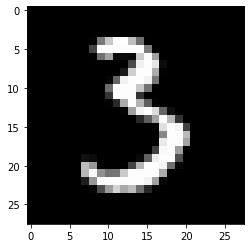

In [134]:
from matplotlib import pyplot
import numpy as np
# x_train[0] 一维的784个数据.reshape成 28*28 的，cmap 用一个灰度图去做
pyplot.imshow(X_train.iloc[1].values.reshape(28,28), cmap="gray")

In [135]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
y_train

28926    7
9080     3
52804    0
28094    1
46585    2
        ..
21243    7
45891    8
42613    7
43567    1
68268    1
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [137]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
y_test

10840    0
56267    4
14849    1
62726    2
47180    7
        ..
63055    7
7991     6
39237    1
21866    3
38802    0
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [139]:
X_train = np.array(X_train)          # 将features转为numpy格式
X_test = np.array(X_test)
# y_train = list(map(int, y_train))    # 将label的str类型转为int
# y_test = list(map(int, y_test))
y_train = np.array(y_train,dtype=float)   # 将label的str类型转为int
y_test = np.array(y_test,dtype=float)

In [140]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
X_train.shape

(60000, 784)

In [142]:
torch.from_numpy(X_train)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [143]:
y_train.dtype

dtype('float64')

In [144]:
# 转化为数据格式
import torch
# torch 放在 GPU 中跑，底层结构不同。tensor 张量（矩阵）一切处理的数据都是张量，TensorFlow 张量（矩阵）在流动，矩阵在变换
# ndarray格式 torch 用不了
# 使用 map 将数组格式映射为 tensor 格式
# x_train, y_train, x_valid, y_valid = map(torch.from_numpy(), (X_train, y_train, X_test, y_test))
x_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.long)
x_valid = torch.tensor(X_test,dtype=torch.float32)
y_valid = torch.tensor(y_test,dtype=torch.long)


In [145]:
y_train.dtype

torch.int64

In [146]:
# 设置损失函数和全连接层
import torch.nn.functional as F

# 计算损失
loss_func = F.cross_entropy# 用loss_func的时候要传入（pre,y）预测值和标签

# 全连接层
def model(xb):
    return xb.mm(weights) + bias

# 设置参数
# batchsize：一次性训练的样本个数
bs = 64
# xw + b,w哪里来，可以自己做初始化，权重参数随机初始化，
# x 的规格。64*784（每个样本 784 个特征）
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]
# 随机初始化权重参数 w：784*10 ，需要梯度
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 
bs = 64
# 偏执可以是随机数，可以常数，对结果的影响是非常小的
bias = torch.zeros(10, requires_grad=True)

# model(xb) 预测值, yb标签
print(loss_func(model(xb), yb))

tensor(16.0849, grad_fn=<NllLossBackward0>)


torch.nn.functional

一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional(如激活函数、损失函数)相对更简单一些

In [147]:
# 初始化网络结构
from torch import nn

# 继承不能改
class Mnist_NN(nn.Module):
#     构造函数（接下来你会用到哪一层，哪一些操作，每一层的设计要给出来），先定义好第一个 FC，第二个 FC，输出层，dropout
    def __init__(self):
        super().__init__()
#       第一个隐层：输入 784 个像素点（第一行有 784 列），输出 128 个特征（输出 128 行）
        self.hidden1 = nn.Linear(784, 128)
#       第二个隐层：输入（第一个隐层的输出） 128 个像素点，输出 256 个特征
        self.hidden2 = nn.Linear(128, 256)
#       输出层
        self.out  = nn.Linear(256, 10)
#       按照 50%的比例来杀死特征点
        self.dropout = nn.Dropout(0.5)
    
# torch 中的前向传播是需要自己做定义，反向传播是自动的，torch 反向传播一行代码给你实现
# 前向传播
# x 是 batch 值，x 每一步要走什么都是要自己定义的
    def forward(self, x):
#       第一步走h1，
        x = F.relu(self.hidden1(x))
#       每一个 FC 层都要加上 dropout，除了最后一层输出层
        x = self.dropout(x)
#       h2 层
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
#       输出层  
        x = self.out(x)
        return x
        
# 首先定义好自己的网络结构，定义一个类，类当中构造函数要用啥，每一层要怎么去走，要自己去定义

In [148]:
net = Mnist_NN()
print(net)


Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [149]:
# 打印权重和偏置值
for name, parameter in net.named_parameters():
    print(name, parameter, parameter.size())


hidden1.weight Parameter containing:
tensor([[ 0.0124,  0.0047, -0.0074,  ...,  0.0318, -0.0087,  0.0107],
        [-0.0303, -0.0098, -0.0353,  ...,  0.0345,  0.0135, -0.0278],
        [-0.0330,  0.0274, -0.0025,  ..., -0.0173,  0.0009, -0.0134],
        ...,
        [-0.0166, -0.0201,  0.0126,  ..., -0.0039, -0.0325, -0.0143],
        [-0.0193, -0.0339,  0.0047,  ...,  0.0332,  0.0133,  0.0018],
        [ 0.0135, -0.0182, -0.0349,  ...,  0.0184, -0.0150, -0.0329]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 5.8502e-03,  1.2615e-02,  2.6641e-02, -3.5045e-02,  1.0497e-02,
        -2.8817e-02, -8.8946e-03, -1.0250e-02,  4.5343e-03, -2.8259e-02,
        -9.7268e-03,  1.5720e-02,  4.6808e-03, -3.1617e-02, -2.1273e-02,
        -1.9286e-02,  2.8239e-02, -6.3414e-03,  2.5660e-02, -1.5734e-02,
         7.8884e-03,  2.2447e-02,  2.6967e-02,  1.5747e-02, -5.9187e-03,
         2.1809e-02, -3.2418e-02, -1.8322e-02,  1.6703e-02,  3.1579e-02,
      

In [150]:
# 使用TensorDataset和DataLoader
from torch.utils.data import TensorDataset, DataLoader
bs = 64
train_ds = TensorDataset(x_train, y_train)
train_dl  = DataLoader(dataset = train_ds, batch_size = bs, shuffle = True)
valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(dataset = valid_ds, batch_size = bs * 2)
def get_dataloader(train_ds, valid_ds, batch_size):
    return (
        DataLoader(dataset = train_ds, batch_size = batch_size, shuffle = True),
        DataLoader(dataset = valid_ds, batch_size = batch_size * 2)
    )


In [151]:
# 优化器
from torch import optim

def get_model():
    model = Mnist_NN()
#     多返回一个优化器
# 先用 SGD 梯度下降（更新那一些参数，model.parameters()所有参数都更新,）
# lr：学习率，开始时尽可能小一些，迭代次数尽可能大一些
    return model, optim.SGD(model.parameters(), lr=0.001)

In [152]:
# 1、计算loss
# 2、更新 W，b
def loss_batch(model, loss_func, xb, yb, opt=None):
#     model(xb)：把输入放模型当中，有预测值, yb：真实值
    loss = loss_func(model(xb), yb)

#     优化器
    if opt is not None:
#         反向传播，算梯度    （需更新的每一层权重参数都计算出来了）
        loss.backward()
#     执行更新，有学习率，有梯度方向，沿着梯度方向走一个学习率大小
        opt.step()
#     torch 的特点，默认每次更新的梯度方向为前面所有梯度值的和
#     zero_grad()：需要加上zero_grad()，更新梯度之后，赶紧为零
        opt.zero_grad()

#     返回 loss.item()，和 len 值，表示训练样本有多少个，要计算平均损失
    return loss.item(), len(xb)

In [153]:
import numpy as np
# 有了 model、data，开始 train val
# steps：数据迭代多少轮（自己定）
# model：定义一个类 net
# loss——func：损失函数F.cross 
# opt:优化器，梯度下降
# train_dl, valid_dl：dataloader-构建数据的打包器
def fit(steps, model, loss_func, opt, train_dl, valid_dl):
#     每一次做一个遍历，steps 不是 batch，而是 epoch ，就是把整个数据集训练一遍
# 例如 10000 个数据，batch = 100，那么 1 epoch = 100 iter，一次 epoch = 100 次迭代
    for step in range(steps):
#         遍历的时候注意 指定 model 的模式
# 训练，更新每一层的 W 和 b
        model.train()
        for xb, yb in train_dl:
#             ！！！那前向传播 forward 函数的作用是什么
            loss_batch(model, loss_func, xb, yb, opt)

# 验证模式，没有梯度，不更新 W，b
        model.eval()
#     no_grad()：不更新参数
        with torch.no_grad():
# zip：python 基础，losses 和 num 是对应的
            losses, nums = zip(
#                 配对之后再解开，损失放在一起，样本数量放在一起
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
#     计算平均损失
# losses，nums 都是list，做一个乘法，然后加到一起，相当于我们算一个总的损失。
# 最后求一个平均损失
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [154]:
train_dl, valid_dl = get_dataloader(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

当前step:0 验证集损失：2.272473097991943
当前step:1 验证集损失：2.2309465896606446
当前step:2 验证集损失：2.161337325286865
当前step:3 验证集损失：2.045743892288208
当前step:4 验证集损失：1.8706771821975707
当前step:5 验证集损失：1.648413585472107
当前step:6 验证集损失：1.4193311029434204
当前step:7 验证集损失：1.2206530841827392
当前step:8 验证集损失：1.0609500563621521
当前step:9 验证集损失：0.9374064490318298
当前step:10 验证集损失：0.8422410299301147
当前step:11 验证集损失：0.7702293790817261
当前step:12 验证集损失：0.7141710482597351
当前step:13 验证集损失：0.6693857133865356
当前step:14 验证集损失：0.6329484337329865
当前step:15 验证集损失：0.6014164227485657
当前step:16 验证集损失：0.5756183822631836
当前step:17 验证集损失：0.5532853662014008
当前step:18 验证集损失：0.5333936338901519
当前step:19 验证集损失：0.5163269060611725
当前step:20 验证集损失：0.5012408969879151
当前step:21 验证集损失：0.4871598012924194
当前step:22 验证集损失：0.4748562239646912
当前step:23 验证集损失：0.46361174912452696
当前step:24 验证集损失：0.4528853633880615


In [155]:
correct = 0
total = 0
for xb,yb in valid_dl:
    outputs = model(xb)
#     torch.max(outputs.data,1), 1：指定沿着哪个维度去做计算，对每一个样本比他的概率值，沿着每一个样本概率值的维度 1,
# 0 是比不同样本之间的
    _,predicted = torch.max(outputs.data,1)
#     _占位符：返回两个值，第一个没啥用，也不起名字，占个位置
# 每个样本当中都有预测值，_返回的是最大的那个值是什么值
# predicted：当前的最大值他所在的位置是什么，索引也对应了预测结果（0~9）,只要预测结果（索引）
    total += yb.size(0)# batchsize = 64，计算完 64 个样本了，total 加上去
#     yb：真实值，每个样本本身的标签，predicted：预测值
# .item()：tensor 格式，跑验证集时，可能要画图，tensor 格式不行，得转换成 array 数据形式
    correct += (predicted == yb).sum().item()
    
print('Accuracy of the network on the 10000 test images:%d %%'%(100 * correct / total))

Accuracy of the network on the 10000 test images:87 %


认真了，我们寻到一个可用的代码进行实操，实操结束后将对前面的代码进行修正

In [156]:
## 导入依赖包
import torch
import torchvision
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
# % matplotlib inline

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

from torch import nn

import numpy as np


## DataLoader的用途
- pytorch与外界数据沟通的桥梁
- dataloader能供pytorch直接使用
- dataloader作为python自带的numpy数据类型中转
- 过程：numpy -> tensor -> dataset -> dataloader

In [157]:
# dataloader
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=0)  # 数据切分，训练集：测试集=6:1

X_train = np.array(X_train)          # 将list转为numpy格式
X_test = np.array(X_test)
y_train = list(map(int, y_train))    # 将label的str类型转为int
y_test = list(map(int, y_test))
X_train = torch.Tensor(X_train)      # 转为浮点tensor
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)  # 转为整型tensor
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)  # 转为Dataset
ds_test = TensorDataset(X_test, y_test)

# 转为Pytorch可以直接操作彻底DataLoader
loader_train = DataLoader(ds_train, batch_size=(64), shuffle=True)
loader_test = DataLoader(ds_test, batch_size=(64), shuffle=True)


In [158]:
# # build nn with keras sytle
# model = nn.Sequential()                             # 获取网络模型句柄
# model.add_module('fc1', nn.Linear(28*28*1, 100))    # 第一层神经元，输入层
# model.add_module('relu1', nn.ReLU())                # 第一层激活函数
# model.add_module('fc2', nn.Linear(100, 100))        # 第二层神经元，中间层
# model.add_module('relu2', nn.ReLU())                # 第二层激活函数
# model.add_module('fc3', nn.Linear(100, 10))         # 第三层神经元，输出层
# print(model)

# build nn with chainer style

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self, n_in, n_mid, n_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_mid)
        self.fc2 = nn.Linear(n_mid, n_mid)
        self.fc3 = nn.Linear(n_mid, n_out)
        
    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        output = self.fc3(h2)
        return output
    
    
model = Net(n_in=28*28*1, n_mid=100, n_out=10)
print(model)




Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [159]:
# loss function

from torch import optim

loss_fn = nn.CrossEntropyLoss()                       # 选取交叉熵作为误差函数
optimizer = optim.Adam(model.parameters(), lr=0.01)   # 设置优化器参数，学习率0.01


In [160]:
# learning and predict process

# 训练阶段
def train(epoch):
    model.train()
    
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        
    print("epoch{}:结束\n".format(epoch))

# 推理阶段
def test():
    model.eval()
    correct = 0
    
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_sum = len(loader_test.dataset)
    print("\n 测试数据的准确率 ： {}/{} ({:.0f}%)\n".
         format(correct, data_sum, 100. * correct / data_sum))
        
# 训练前的分类准确率
test()
# 训练3个epoch过程
for epoch in range(10):
    train(epoch)
# 训练后的分类准确率
test()





 测试数据的准确率 ： 1141/10000 (11%)

epoch0:结束

epoch1:结束

epoch2:结束

epoch3:结束

epoch4:结束

epoch5:结束

epoch6:结束

epoch7:结束

epoch8:结束

epoch9:结束


 测试数据的准确率 ： 9626/10000 (96%)



预测结果是0
这一图像数据的正确标签是0


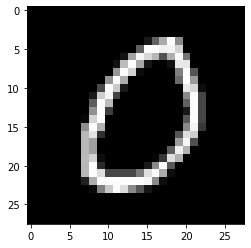

In [161]:
# predict particular picture

# 推理第8505张图片的数字类别
index = 8505
model.eval()
data = X_test[index]

output = model(data)
_, predicted = torch.max(output.data, 0)
print("预测结果是{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("这一图像数据的正确标签是{:.0f}".format(y_test[index]))

